#House Price - linear regression

##Load data from files downloaded from Kaggle

In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_absolute_percentage_error, mean_squared_log_error, root_mean_squared_error
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import shap
import datetime

In [2]:
#%pip install shap

In [3]:
#from google.colab import drive
#drive.mount('/content/drive')

In [4]:
#https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/data
#file_train='/content/drive/MyDrive/Colab Notebooks/Kagle_Competition/House_Price/train.csv'
#file_test='/content/drive/MyDrive/Colab Notebooks/Kagle_Competition/House_Price/test.csv'

file_train='train_California.csv'
file_test='test_California.csv'


In [5]:
train_df = pd.read_csv(file_train) 
test_df = pd.read_csv(file_test) 
df_sub = pd.read_csv('sample_submission_California.csv')

In [6]:
train_df.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


In [7]:
#Statistics, Age and LotFrontage is not allways filled - see row count
train_df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [8]:
#Data types
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [9]:
# It's allways necessary to check train data too
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

In [10]:
# find categorical variables
categorical = [col for col in train_df.columns if train_df[col].dtype=='O']
print('There are {} categorical variables'.format(len(categorical)))
train_df[categorical].head()

There are 43 categorical variables


,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
4,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal


In [11]:
# find numerical variables
numerical = [col for col in train_df.columns if train_df[col].dtype!='O']
print('There are {} numerical variables'.format(len(numerical)))
train_df[numerical].head()

There are 38 numerical variables


,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,192,84,0,0,0,0,0,12,2008,250000


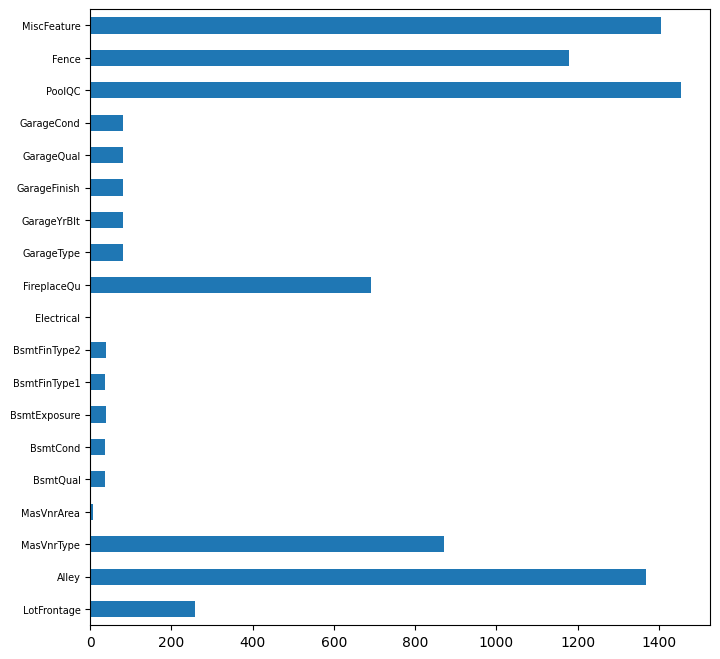

In [12]:
#null values
import matplotlib.pyplot as plt
null_counts = train_df.isnull().sum()
null_counts = null_counts[null_counts > 0]
plt.figure(figsize=(8, 8))
null_counts.plot(kind='barh')
plt.yticks(fontsize=7)
plt.show()

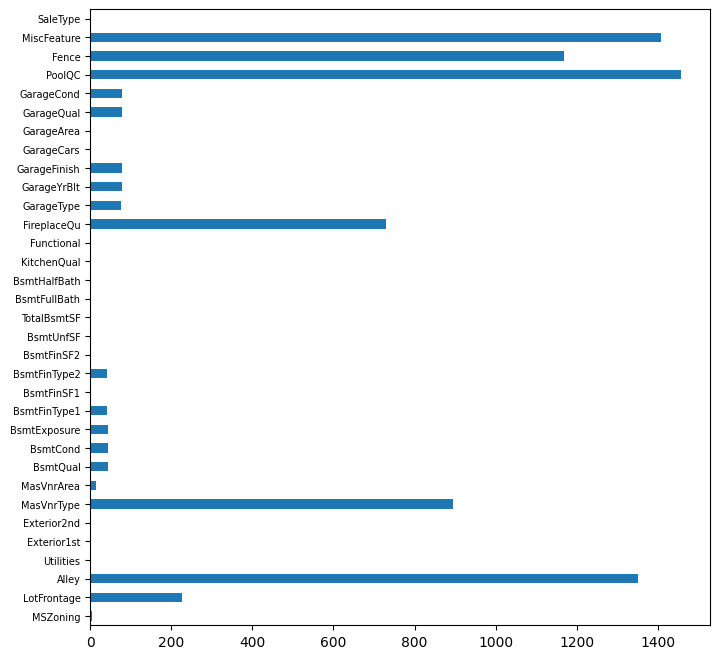

In [13]:
null_counts = test_df.isnull().sum()
null_counts = null_counts[null_counts > 0]
plt.figure(figsize=(8, 8))
null_counts.plot(kind='barh')
plt.yticks(fontsize=7)
plt.show()

In [14]:
train_df["Neighborhood"].unique()

array(['CollgCr', 'Veenker', 'Crawfor', 'NoRidge', 'Mitchel', 'Somerst',
       'NWAmes', 'OldTown', 'BrkSide', 'Sawyer', 'NridgHt', 'NAmes',
       'SawyerW', 'IDOTRR', 'MeadowV', 'Edwards', 'Timber', 'Gilbert',
       'StoneBr', 'ClearCr', 'NPkVill', 'Blmngtn', 'BrDale', 'SWISU',
       'Blueste'], dtype=object)

In [15]:
train_df['MSZoning'].value_counts()

MSZoning
RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: count, dtype: int64

In [16]:
train_df["HouseStyle"].unique()

array(['2Story', '1Story', '1.5Fin', '1.5Unf', 'SFoyer', 'SLvl', '2.5Unf',
       '2.5Fin'], dtype=object)

In [17]:
train_df["Street"].unique()

array(['Pave', 'Grvl'], dtype=object)

In [18]:
train_df["Alley"].unique()

array([nan, 'Grvl', 'Pave'], dtype=object)

In [19]:
train_df['MSSubClass'].value_counts()

MSSubClass
20     536
60     299
50     144
120     87
30      69
160     63
70      60
80      58
90      52
190     30
85      20
75      16
45      12
180     10
40       4
Name: count, dtype: int64

In [20]:
train_df.groupby("LotShape")["SalePrice"].mean()

LotShape
IR1    206101.665289
IR2    239833.365854
IR3    216036.500000
Reg    164754.818378
Name: SalePrice, dtype: float64

In [21]:
train_df.nlargest(10, "LotArea")

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
313,314,20,RL,150.0,215245,Pave,NaN,IR3,Low,AllPub,...,0,NaN,NaN,NaN,0,6,2009,WD,Normal,375000
335,336,190,RL,NaN,164660,Grvl,NaN,IR1,HLS,AllPub,...,0,NaN,NaN,Shed,700,8,2008,WD,Normal,228950
249,250,50,RL,NaN,159000,Pave,NaN,IR2,Low,AllPub,...,0,NaN,NaN,Shed,500,6,2007,WD,Normal,277000
706,707,20,RL,NaN,115149,Pave,NaN,IR2,Low,AllPub,...,0,NaN,NaN,NaN,0,6,2007,WD,Normal,302000
451,452,20,RL,62.0,70761,Pave,NaN,IR1,Low,AllPub,...,0,NaN,NaN,NaN,0,12,2006,WD,Normal,280000
1298,1299,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,AllPub,...,480,Gd,NaN,NaN,0,1,2008,New,Partial,160000
1396,1397,20,RL,NaN,57200,Pave,NaN,IR1,Bnk,AllPub,...,0,NaN,NaN,NaN,0,6,2010,WD,Normal,160000
769,770,60,RL,47.0,53504,Pave,NaN,IR2,HLS,AllPub,...,0,NaN,NaN,NaN,0,6,2010,WD,Normal,538000
457,458,20,RL,NaN,53227,Pave,NaN,IR1,Low,AllPub,...,0,NaN,NaN,NaN,0,3,2008,WD,Normal,256000
384,385,60,RL,NaN,53107,Pave,NaN,IR2,Low,AllPub,...,0,NaN,NaN,NaN,0,6,2007,WD,Normal,240000


In [22]:
train_df.groupby("BldgType")["SalePrice"].mean()

BldgType
1Fam      185763.807377
2fmCon    128432.258065
Duplex    133541.076923
Twnhs     135911.627907
TwnhsE    181959.342105
Name: SalePrice, dtype: float64

In [23]:
train_df.groupby("Foundation")["SalePrice"].mean()

Foundation
BrkTil    132291.075342
CBlock    149805.714511
PConc     225230.442040
Slab      107365.625000
Stone     165959.166667
Wood      185666.666667
Name: SalePrice, dtype: float64

In [24]:
train_df.groupby("CentralAir")["SalePrice"].mean()

CentralAir
N    105264.073684
Y    186186.709890
Name: SalePrice, dtype: float64

In [25]:
test_df["KitchenQual"].value_counts()

KitchenQual
TA    757
Gd    565
Ex    105
Fa     31
Name: count, dtype: int64

# Preprocessing

In [26]:
#it is necessary join train and test data to contain same columns after usage of get_dummies function
df_complet = pd.concat([train_df, test_df])
#zresetování indexu
df_complet = df_complet.reset_index(drop=True).reset_index()
print(f"train_df shape   : {train_df.shape}")
print(f"test_df shape    : {test_df.shape}")
print(f"df_complet shape : {df_complet.shape}")

train_df shape   : (1460, 81)
test_df shape    : (1459, 80)
df_complet shape : (2919, 82)


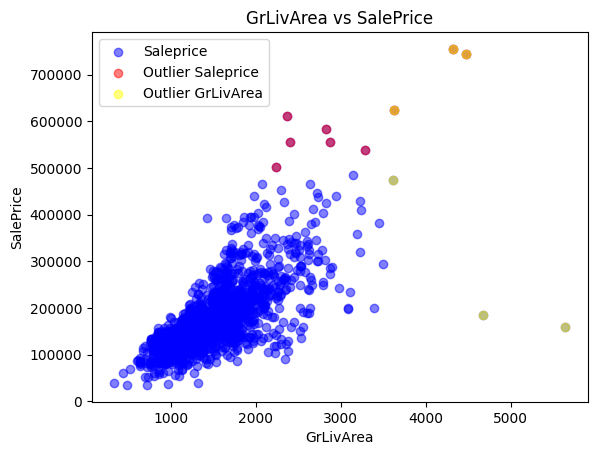

In [27]:
#Plot GrLivArea vs SalePrice https://www.kaggle.com/code/felipefiorini/house-prices-xgboost-outlier-detect
df_oSalePrice = df_complet.query('SalePrice >= 500000')
df_oGrLivAreA = df_complet.query('GrLivArea >= 3500')
plt.scatter(df_complet['GrLivArea'], df_complet['SalePrice'], color='blue', alpha=0.5,label='Saleprice')
plt.scatter(df_oSalePrice['GrLivArea'],   df_oSalePrice['SalePrice'],   color='red',  alpha=0.5, label='Outlier Saleprice')
plt.scatter(df_oGrLivAreA['GrLivArea'],   df_oGrLivAreA['SalePrice'],   color='yellow',  alpha=0.5, label='Outlier GrLivArea')
plt.legend(loc="upper left")
plt.title("GrLivArea vs SalePrice")
plt.xlabel("GrLivArea")
plt.ylabel("SalePrice")
plt.show()

In [28]:
pd.options.mode.copy_on_write = True #warning removal
y = train_df[['Id', 'SalePrice']]
y['Id'] = y['Id'] -1 
y.rename(columns = {'Id':'index'}, inplace = True)
new_submission = test_df[["Id"]] #Id preserved
new_submission.head()

,Id
0,1461
1,1462
2,1463
3,1464
4,1465


In [29]:
# Optional outlier handling
#Outliers
outliers_input = pd.DataFrame()

def outlier_shrink(df):
    df = df.select_dtypes(include='number')
    df = df.fillna(0)
    startcnt = df.shape[0]
    df = df.query('SalePrice < 500000')
    aftercnt = df.shape[0]
    print(f'Row start: {startcnt} end: {aftercnt} decrease by SalePrice: {startcnt - aftercnt}')
    startcnt = aftercnt
    df = df.query('LotFrontage < 200')
    aftercnt = df.shape[0]
    print(f'Row start: {startcnt} end: {aftercnt} decrease by LotFrontage: {startcnt - aftercnt}')
    startcnt = aftercnt
    df = df.query('LotArea < 60000')
    aftercnt = df.shape[0]
    print(f'Row start: {startcnt} end: {aftercnt} decrease by LotArea: {startcnt - aftercnt}')
    startcnt = aftercnt
    df = df.query('MasVnrArea < 1250')
    aftercnt = df.shape[0]
    print(f'Row start: {startcnt} end: {aftercnt} decrease by MasVnrArea: {startcnt - aftercnt}')
    startcnt = aftercnt
    df = df.query('TotalBsmtSF < 2500')
    aftercnt = df.shape[0]
    print(f'Row start: {startcnt} end: {aftercnt} decrease by TotalBsmtSF: {startcnt - aftercnt}')
    startcnt = aftercnt
    df = df.query('YearBuilt > 1880')
    aftercnt = df.shape[0]
    print(f'Row start: {startcnt} end: {aftercnt} decrease by YearBuilt: {startcnt - aftercnt}')
    startcnt = aftercnt
    df = df.query('LowQualFinSF < 300')
    aftercnt = df.shape[0]
    print(f'Row start: {startcnt} end: {aftercnt} decrease by LowQualFinSF: {startcnt - aftercnt}')
    startcnt = aftercnt
    df = df.query('GrLivArea < 3000')
    aftercnt = df.shape[0]
    print(f'Row start: {startcnt} end: {aftercnt} decrease by GrLivArea: {startcnt - aftercnt}')
    startcnt = aftercnt
    df = df.query('GarageArea < 1200')
    aftercnt = df.shape[0]
    print(f'Row start: {startcnt} end: {aftercnt} decrease by GarageArea: {startcnt - aftercnt}')
    startcnt = aftercnt
    df = df.query('PoolArea < 500')
    aftercnt = df.shape[0]
    print(f'Row start: {startcnt} end: {aftercnt} decrease by PoolArea: {startcnt - aftercnt}')
    return (df)

outliers_input = outlier_shrink(train_df)

print("outliers_input shape: ", outliers_input.shape)

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

outliers = pd.DataFrame()

def detect_outliers(df):    
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3 - Q1
    outlier_mask = (df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))    
    return df[outlier_mask]

# Apply the function to get outliers
numerical = train_df.select_dtypes(include='number').columns
outliers = pd.DataFrame()

for column in numerical:
    outliers[column] = detect_outliers(train_df[column])
    
    fig, ax = plt.subplots(figsize=(2, 3))
    outliers_input[[column]].boxplot(ax=ax)  # Only plot the current column
    plt.xticks(rotation=45)
    plt.ylabel('Values')
    plt.title(f'Boxplot for {column}')
    #plt.show()
    plt.close()
# Display the outliers
#print(outliers)

outliers_input = outliers_input.iloc[:,[0]] #ponecháme jen index pro budoucí merge
outliers_input.rename(columns = {'Id':'index'}, inplace = True) #a přejmenujeme na index


Row start: 1460 end: 1451 decrease by SalePrice: 9
Row start: 1451 end: 1449 decrease by LotFrontage: 2
Row start: 1449 end: 1444 decrease by LotArea: 5
Row start: 1444 end: 1443 decrease by MasVnrArea: 1
Row start: 1443 end: 1438 decrease by TotalBsmtSF: 5
Row start: 1438 end: 1432 decrease by YearBuilt: 6
Row start: 1432 end: 1416 decrease by LowQualFinSF: 16
Row start: 1416 end: 1411 decrease by GrLivArea: 5
Row start: 1411 end: 1407 decrease by GarageArea: 4
Row start: 1407 end: 1403 decrease by PoolArea: 4
outliers_input shape:  (1403, 38)


In [30]:
#one function for train and test
def preproces_data(x):
  x_output = x
  pd.set_option('future.no_silent_downcasting', True)
  for var in ['Id', 'SalePrice']:
    if var in x_output.columns:
      x_output.drop(var, inplace=True, axis =1) #remove Id and Saleprice if exists
  
  x_output['MasVnrArea'] = x_output['MasVnrArea'].fillna(0)
  x_output['BsmtFinSF1'] = x_output['BsmtFinSF1'].fillna(0)
  x_output['BsmtFinSF2'] = x_output['BsmtFinSF2'].fillna(0)
  x_output['BsmtUnfSF'] = x_output['BsmtUnfSF'].fillna(0)
  x_output['TotalBsmtSF'] = x_output['TotalBsmtSF'].fillna(0).astype(float)
  x_output['MSZoning'] = x_output['MSZoning'].fillna('RL')
  x_output['ExterQual'] = x_output['ExterQual'].fillna('TA')
  x_output['HouseStyle'] = x_output['HouseStyle'].fillna('1Story')
  x_output['BsmtCond'] = x_output['BsmtCond'].fillna('Po')
  x_output['KitchenQual'] = x_output['KitchenQual'].fillna('TA')
  x_output['GarageQual'] = x_output['GarageQual'].fillna('NA')
  x_output['Fence'] = x_output['Fence'].fillna('NA')
  x_output['FireplaceQu'] = x_output['FireplaceQu'].fillna('NAN')
  x_output['LotFrontage'] = x_output['LotFrontage'].fillna(0).astype(float) #x_output['LotFrontage'].mean()
  x_output['OpenPorchSF'] = x_output['OpenPorchSF'].fillna(0).astype(float)
  x_output['EnclosedPorch'] = x_output['EnclosedPorch'].fillna(0).astype(float)
  x_output['3SsnPorch'] = x_output['3SsnPorch'].fillna(0).astype(float)
  x_output['ScreenPorch'] = x_output['ScreenPorch'].fillna(0).astype(float)
  x_output['GarageYrBlt'] = x_output['GarageYrBlt'].fillna(0)
  x_output['LotArea'] = x_output['LotArea'].fillna(0)
  x_output['GarageCars'] = x_output['GarageCars'].fillna(0)
  x_output['GarageArea'] = x_output['GarageArea'].fillna(0)
  x_output['BsmtHalfBath'] = x_output['BsmtHalfBath'].fillna(0)
  x_output['RemodAdd'] = 2010 - x_output['YearRemodAdd']

  X_input = x_output
  X_input = x_output.fillna(0)

  x_output = pd.get_dummies(X_input, drop_first = True) #Transform "object" features to feature + value 

  X_input = x_output
  x_output = X_input.fillna(0)
  
  x_output = x_output.replace({True: 1, False: 0}).astype(int) #replace True False to 1, 0 for p.value calculation

  return(x_output)

In [31]:
#preprocessing function call
X_complet = preproces_data(df_complet)
print(f"df_complet shape: {X_complet.shape}") #269 columns

df_complet shape: (2919, 266)


In [32]:
X_complet.head()

,index,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,RemodAdd,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,Alley_Grvl,Alley_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_AllPub,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsbShng,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsbShng,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkCmn,MasVnrType_BrkFace,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Ex,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_TA,BsmtCond_Gd,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Av,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtFinType1_ALQ,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_ALQ,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,Electrical_FuseA,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj1,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_NAN,FireplaceQu_Po,FireplaceQu_TA,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageFinish_Fin,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_Gd,GarageQual_NA,GarageQual_Po,GarageQual_TA,GarageCond_Ex,GarageCond_Fa,GarageCond_Gd,GarageCond_Po,GarageCond_TA,PavedDrive_P,PavedDrive_Y,PoolQC_Ex,PoolQC_Fa,PoolQC_Gd,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_NA,MiscFeature_Gar2,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleTyp

In [33]:
#data split back to dataframes train and test
train_df = pd.DataFrame()
test_df = pd.DataFrame()
train_df = X_complet.loc[0:1459,:] # insert 0 .. 1459 rows and all cols
test_df = X_complet.loc[1460:,:] # insert 1460 .. 2919 rows and all cols
print(f"train_df shape           : {train_df.shape}")
print(f"test_df shape            : {test_df.shape}")
#cut outliers
X = pd.merge(outliers_input, train_df) #outliers removed based on index
y = pd.merge(outliers_input, y)        #outliers removed based on index
X.reset_index(drop=True).reset_index() #because of missing rows reset index
y.reset_index(drop=True).reset_index() #because of missing rows reset index
y = y.drop(columns=['index'])
print(f"X without outlier        : {X.shape}")
print(f"y                        : {y.shape}")

#nulls
print(f"X NaN                    : {X.isnull().sum().sum()}")
#X.head()

train_df shape           : (1460, 266)
test_df shape            : (1459, 266)
X without outlier        : (1402, 266)
y                        : (1402, 1)
X NaN                    : 0


In [34]:
#columns by p-value
X = sm.add_constant(X)
X.index = y.index
model = sm.OLS(y, X).fit()
p_values = model.pvalues
p_values_df = pd.DataFrame(p_values, columns=['p_value'])
p_values_df = p_values_df.sort_values(by='p_value', ascending=True) #lowest p-value is more significant
print(p_values_df)
#we can use cycle and ad features with lowest p-value and compare mean error for improvement
#other method is to extract features and observe impact to mean error

                            p_value
Condition2_PosN        2.060597e-16
LotArea                1.079017e-12
PoolArea               2.456481e-12
PoolQC_Fa              3.686455e-12
PoolQC_Gd              5.996145e-12
PoolQC_Ex              1.165946e-11
KitchenQual_Gd         3.270650e-10
MiscFeature_TenC       4.924727e-10
ExterCond_Po           7.296412e-10
OverallQual            2.721149e-09
OverallCond            2.759526e-09
GrLivArea              1.032605e-08
KitchenQual_TA         7.195402e-08
BsmtFinSF1             5.668657e-07
Neighborhood_StoneBr   2.443043e-06
2ndFlrSF               2.593811e-06
ExterQual_Gd           3.752033e-06
TotalBsmtSF            9.174042e-06
Functional_Typ         1.642332e-05
ExterQual_TA           2.047114e-05
YearBuilt              5.851447e-05
RoofMatl_WdShake       6.205648e-05
RoofMatl_Roll          7.027027e-05
RoofMatl_CompShg       7.166800e-05
RoofMatl_Tar&Grv       7.647541e-05
LandSlope_Sev          1.131080e-04
GarageQual_Fa          1.610

In [35]:
#there is 266 features, so we should define some border for next processing
p_values_df_sel = p_values_df.query('p_value <= 1').sort_values('p_value') #Select features by p_value, 1 for all
print("Selected: ",p_values_df_sel.shape)
rows_to_retain = p_values_df.index.difference(p_values_df_sel.index)
p_values_df_notsel = p_values_df.loc[list(rows_to_retain)] #Not selected features
print("Not selected: ",p_values_df_notsel.shape)
#display(p_values_df)

Selected:  (267, 1)
Not selected:  (0, 1)


In [36]:
p_values_df_sel.head(10)

,p_value
Condition2_PosN,2.060597e-16
LotArea,1.079017e-12
PoolArea,2.456481e-12
PoolQC_Fa,3.686455e-12
PoolQC_Gd,5.996145e-12
PoolQC_Ex,1.165946e-11
KitchenQual_Gd,3.270650e-10
MiscFeature_TenC,4.924727e-10
ExterCond_Po,7.296412e-10
OverallQual,2.721149e-09


In [37]:
index_values = p_values_df_sel.index.tolist()
p_values_df_sel_col = pd.DataFrame()
p_values_df_sel_col.index = index_values
print(len(p_values_df_sel_col))
selected_features = list(p_values_df_sel_col.index)
print("Selected subset of features for next processing: \n", selected_features)


267
Selected subset of features for next processing: 
 ['Condition2_PosN', 'LotArea', 'PoolArea', 'PoolQC_Fa', 'PoolQC_Gd', 'PoolQC_Ex', 'KitchenQual_Gd', 'MiscFeature_TenC', 'ExterCond_Po', 'OverallQual', 'OverallCond', 'GrLivArea', 'KitchenQual_TA', 'BsmtFinSF1', 'Neighborhood_StoneBr', '2ndFlrSF', 'ExterQual_Gd', 'TotalBsmtSF', 'Functional_Typ', 'ExterQual_TA', 'YearBuilt', 'RoofMatl_WdShake', 'RoofMatl_Roll', 'RoofMatl_CompShg', 'RoofMatl_Tar&Grv', 'LandSlope_Sev', 'GarageQual_Fa', 'MasVnrArea', 'RoofMatl_WdShngl', 'Street_Pave', 'RoofMatl_Metal', 'GarageQual_TA', 'RoofMatl_Membran', 'GarageQual_Gd', 'ScreenPorch', 'SaleType_WD', 'GarageQual_Po', 'KitchenQual_Fa', 'Neighborhood_Edwards', 'GarageCond_TA', 'Exterior1st_BrkFace', 'Condition1_Norm', 'RoofStyle_Shed', 'GarageArea', 'WoodDeckSF', 'Neighborhood_NoRidge', 'GarageCond_Fa', 'GarageCond_Gd', 'Neighborhood_Mitchel', 'BsmtCond_Po', 'MSZoning_FV', 'SaleType_COD', 'GarageCond_Po', 'Neighborhood_NridgHt', 'LotConfig_CulDSac', 'Sal

In [38]:
answer = input("Do you want to process feature selection again = 'Y', otherwise features from previous run will be loaded 'N'")
print(answer)

In [39]:
# Function to evaluate model and get mean squared error
if answer == 'Y':

    columns = []
    def evaluate_model(features):
        X_with_const = sm.add_constant(features)
        model = sm.OLS(y, X_with_const).fit()
        predictions = model.predict(X_with_const)
        mse = mean_squared_error(y, predictions)
        return mse, model.pvalues

    # Initial empty set of features
    selected_features = []
    remaining_features = list(p_values_df_sel_col.index)

    # Track the improvement in model error
    best_mse = float('inf')
    sel_feature_cnt  = 0
    iteration_cnt = 0

    while remaining_features and len(p_values_df_sel_col) > iteration_cnt:        
        p_values_dict = {}
        mse_dict = {}
        iteration_cnt += 1
        # Evaluate each feature not yet selected
        for feature in remaining_features:
            features_to_evaluate = selected_features + [feature]
            mse, p_values = evaluate_model(X[features_to_evaluate])
            p_values_dict[feature] = p_values
            mse_dict[feature] = mse

        # Select the feature that gives the best improvement in MSE
        best_feature = min(mse_dict, key=mse_dict.get)
        best_feature_mse = mse_dict[best_feature]

        # Check if the new model is better
        if best_feature_mse < best_mse:
            best_mse = best_feature_mse
            selected_features.append(best_feature)
            sel_feature_cnt += 1
            remaining_features.remove(best_feature)
            print(f"best_feature append: {best_feature}  ME: {np.sqrt(best_feature_mse)} Selected feature count: {sel_feature_cnt}")        
        else:
            # If no improvement, break the loop
            #break
            pass

    # Final model with selected features
    final_mse, final_p_values = evaluate_model(X[selected_features])
    final_p_values_df = pd.DataFrame(final_p_values, columns=['p-value'])

    # Open a file in write binary mode
    with open('my_final_p_values_df.pkl', 'wb') as f:
        final_p_values_df = final_p_values_df.drop(index='const')
        pickle.dump(final_p_values_df, f)

    # Display the final p-values and selected features
    print(f"Selected features: {selected_features}")
    print(f"Final model ME: {np.sqrt(best_mse)}")

else:
  with open('my_final_p_values_df.pkl', 'rb') as f:
    final_p_values_df = pd.DataFrame(pickle.load(f))    

print(final_p_values_df.head(10))


                      p-value
OverallQual      2.721149e-09
GrLivArea        1.364518e-16
BsmtQual_Ex      2.741336e-01
BsmtFinSF1       3.135762e-01
GarageCars       8.541348e-02
PoolQC_Gd        5.996145e-12
MSSubClass       5.979126e-01
Condition2_PosN  2.060597e-16
BsmtExposure_No  7.526344e-01
ExterQual_TA     2.047114e-05


In [40]:
X = X.drop(columns=['const']) #remove column const to have same features
selected_features = final_p_values_df.index.tolist()

In [41]:
#selected subset of columns, when previous code run for all 266 colls 17 minutes locally ME is 20196
#but no signifficant improvement after 236 feature, but more features means propensity to overfitting
col_sel = selected_features[:236]
col_sel_limited = selected_features[:100]
#columns removal
X_restricted = pd.DataFrame()
X_restricted = X[col_sel]
#X_restricted = X
X = X_restricted
#modify test data 
X_restricted = pd.DataFrame()
X_restricted = test_df[col_sel]
#X_restricted = X_kaggle
X_restricted.shape
test_df = X_restricted
print(X.shape)
print(test_df.shape)
print(X_restricted.shape)
print(len(col_sel_limited))

(1402, 236)
(1459, 236)
(1459, 236)
100


In [42]:
X[col_sel_limited].head(10)

,OverallQual,GrLivArea,BsmtQual_Ex,BsmtFinSF1,GarageCars,PoolQC_Gd,MSSubClass,Condition2_PosN,BsmtExposure_No,ExterQual_TA,Neighborhood_NridgHt,Neighborhood_NoRidge,Neighborhood_StoneBr,OverallCond,YearBuilt,LotArea,RoofMatl_WdShngl,Neighborhood_Crawfor,ExterQual_Gd,PoolArea,PoolQC_Fa,PoolQC_Ex,SaleType_New,MiscFeature_TenC,BsmtExposure_Gd,TotalBsmtSF,Neighborhood_Somerst,BldgType_Duplex,Functional_Typ,ExterQual_Fa,Exterior1st_BrkFace,Condition1_Norm,SaleCondition_Normal,BedroomAbvGr,Neighborhood_BrkSide,Street_Pave,ScreenPorch,GarageQual_NA,TotRmsAbvGrd,LowQualFinSF,GarageArea,Functional_Sev,LandContour_Low,LotConfig_CulDSac,Neighborhood_Mitchel,KitchenQual_Gd,KitchenQual_TA,KitchenQual_Fa,SaleType_CWD,MasVnrArea,MasVnrType_BrkFace,WoodDeckSF,RoofMatl_Membran,LandSlope_Sev,Foundation_PConc,Fireplaces,FireplaceQu_NAN,KitchenAbvGr,BldgType_2fmCon,Neighborhood_Edwards,Heating_OthW,BsmtFullBath,Condition2_PosA,Neighborhood_NAmes,Neighborhood_NWAmes,Condition1_RRAe,MSZoning_RL,MasVnrType_BrkCmn,Exterior1st_Stucco,SaleType_Con,Foundation_Wood,YearRemodAdd,Exterior2nd_Plywood,MSZoning_FV,Utilities_AllPub,BsmtQual_Gd,MoSold,SaleType_ConLD,3SsnPorch,Exterior1st_HdBoard,GarageFinish_RFn,LandSlope_Mod,RoofStyle_Mansard,BsmtFinType2_ALQ,BsmtCond_Po,BsmtCond_TA,2ndFlrSF,Functional_Min2,GarageType_2Types,Neighborhood_SawyerW,FullBath,RoofStyle_Shed,Condition2_RRAe,RoofMatl_Metal,BsmtFinType1_GLQ,BsmtExposure_Av,BsmtExposure_Mn,GarageCond_TA,HouseStyle_1.5Unf,Exterior2nd_Other
0,6,1262,0,978,2,0,20,0,0,1,0,0,0,8,1976,9600,0,0,0,0,0,0,0,0,1,1262,0,0,1,0,0,0,1,3,0,1,0,0,6,0,460,0,0,0,0,0,1,0,0,0,0,298,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1976,0,0,1,1,5,0,0,0,1,0,0,0,0,1,0,0,0,0,2,0,0,0,0,0,0,1,0,0
1,7,1786,0,486,2,0,60,0,0,0,0,0,0,5,2001,11250,0,0,1,0,0,0,0,0,0,920,0,0,1,0,0,1,1,3,0,1,0,0,6,0,608,0,0,0,0,1,0,0,0,162,1,0,0,0,1,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,2002,0,0,1,1,9,0,0,0,1,0,0,0,0,1,866,0,0,0,2,0,0,0,1,0,1,1,0,0
2,7,1717,0,216,3,0,70,0,1,1,0,0,0,5,1915,9550,0,1,0,0,0,0,0,0,0,756,0,0,1,0,0,1,0,3,0,1,0,0,7,0,642,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1970,0,0,1,0,2,0,0,0,0,0,0,0,0,0,756,0,0,0,1,0,0,0,0,0,0,1,0,0
3,8,2198,0,655,3,0,60,0,0,0,0,1,0,5,2000,14260,0,0,1,0,0,0,0,0,0,1145,0,0,1,0,0,1,1,4,0,1,0,0,9,0,836,0,0,0,0,1,0,0,0,350,1,192,0,0,1,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,2000,0,0,1,1,12,0,0,0,1,0,0,0,0,1,1053,0,0,0,2,0,0,0,1,1,0,1,0,0
4,5,1362,0,732,2,0,50,0,1,1,0,0,0,5,1993,14115,0,0,0,0,0,0,0,0,0,796,0,0,1,0,0,1,1,1,0,1,0,0,5,0,480,0,0,0,1,0,1,0,0,0,0,40,0,0,0,0,1,1,0,0,0,1,0,0,0,0,1,0,0,0,1,1995,0,0,1,1,10,0,320,0,0,0,0,0,0,1,566,0,0,0,1,0,0,0,1,0,0,1,0,0
5,8,1694,1,1369,2,0,20,0,0,0,0,0,0,5,2004,10084,0,0,1,0,0,0,0,0,0,1686,1,0,1,0,0,1,1,3,0,1,0,0,7,0,636,0,0,0,0,1,0,0,0,186,0,255,0,0,1,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,2005,0,0,1,0,8,0,0,0,1,0,0,0,0,1,0,0,0,0,2,0,0,0,1,1,0,1,0,0
6,7,2090,0,859,2,0,60,0,0,1,0,0,0,6,1973,10382,0,0,0,0,0,0,0,0,0,1107,0,0,1,0,0,0,1,3,0,1,0,0,7,0,484,0,0,0,0,0,1,0,0,240,0,235,0,0,0,2,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,1973,0,0,1,1,11,0,0,1,1,0,0,0,0,1,983,0,0,0,2,0,0,0,0,0,1,1,0,0
7,7,1774,0,0,2,0,50,0,1,1,0,0,0,5,1931,6120,0,0,0,0,0,0,0,0,0,952,0,0,0,0,1,0,0,2,0,1,0,0,8,0,468,0,0,0,0,0,1,0,0,0,0,90,0,0,0,2,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,1950,0,0,1,0,4,0,0,0,0,0,0,0,0,1,752,0,0,0,2,0,0,0,0,0,0,1,0,0
8,5,1077,0,851,1,0,190,0,1,1,0,0,0,6,1939,7420,0,0,0,0,0,0,0,0,0,991,0,0,1,0,0,0,1,2,1,1,0,0,5,0,205,0,0,0,0,0,1,0,0,0,0,0,0,0,0,2,0,2,1,0,0,1,0,0,0,0,1,0,0,0,0,1950,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,1,0
9,5,1040,0,906,1,0,20,0,1,1,0,0,0,5,1965,11200,0,0,0,0,0,0,0,0,0,1040,0,0,1,0,0,1,1,3,0,1,0,0,5,0,384,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1965,0,0,1,0,2,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0


In [43]:
# Initialize variables to store the minimum MSE and the best number of features
min_me = float('inf')
min_train_score = float('inf')
min_test_score = float('inf')
best_num_features = 0
best_model = None

# Loop through each subset size from 1 to the length of col_sel_limited
for i in range(1, len(col_sel_limited) + 1):
    # Select the first i features
    selected_features = col_sel_limited[:i]
    
    # Split the dataset into training and testing sets with the selected features
    X_train, X_test, y_train, y_test = train_test_split(X[selected_features], y, test_size=0.25, random_state=42)
    
    # Initialize and fit the linear regression model
    regr = linear_model.LinearRegression()
    regr.fit(X_train, y_train)
    
    # Predict the target variable for the test set
    y_pred = regr.predict(X_test)
    
    # Calculate the Mean Squared Error (MSE) for the current model
    me = root_mean_squared_error(y_pred, y_test)
    
    # Check if this is the best MSE and update the variables accordingly
    if me < min_me:
        min_me = me
        best_num_features = i
        min_train_score = round(regr.score(X_train, y_train), 5)
        min_test_score = round(regr.score(X_test, y_test), 5)
        best_model = regr
        col_sel_best = selected_features
    
    # Print the results for each iteration
    #print(f"Number of Features: {i} ME: {me}")
    
# Output the best result
print(f"Best ME: {min_me} with {best_num_features} features.")
print("Best model Train Score:             ", min_train_score)
print("Best model Test Score:              ", min_test_score)
#print(f"Best Model Coefficients: {best_model.coef_}")

Best ME: 42154.887883551324 with 16 features.
Best model Train Score:              0.87164
Best model Test Score:               0.76059


In [44]:
#Normalize
x = X[col_sel_limited].values #returns a numpy array
scaler = preprocessing.StandardScaler()
scaler.fit(x)
x_scaled = scaler.transform(x)
X_norm = pd.DataFrame(x_scaled, columns=col_sel_limited)
#Split data to test and train
X_train_norm, X_test_norm, y_train_norm, y_test_norm = train_test_split(X_norm[selected_features], y, test_size = .25, random_state = 42)

regr_norm = linear_model.LinearRegression() # Do not use fit_intercept = False if you have removed 1 column after dummy encoding

regr_norm.fit(X_train_norm, y_train_norm)

y_pred_norm = regr_norm.predict(X_test_norm)

me = root_mean_squared_error(y_pred_norm, y_test_norm)
    
# Output the best result
print(f"ME: {me} with {best_num_features} features.")
print("Best model Train Score:             ", round(regr_norm.score(X_train_norm, y_train_norm), 5))
print("Best model Test Score:              ", round(regr_norm.score(X_test_norm, y_test_norm), 5))
#print(f"Best Model Coefficients: {best_model.coef_}")

ME: 4529498321880780.0 with 16 features.
Best model Train Score:              0.92925
Best model Test Score:               -2.7640536520070356e+21


In [45]:
col_sel_limited[:16]

['OverallQual',
 'GrLivArea',
 'BsmtQual_Ex',
 'BsmtFinSF1',
 'GarageCars',
 'PoolQC_Gd',
 'MSSubClass',
 'Condition2_PosN',
 'BsmtExposure_No',
 'ExterQual_TA',
 'Neighborhood_NridgHt',
 'Neighborhood_NoRidge',
 'Neighborhood_StoneBr',
 'OverallCond',
 'YearBuilt',
 'LotArea']

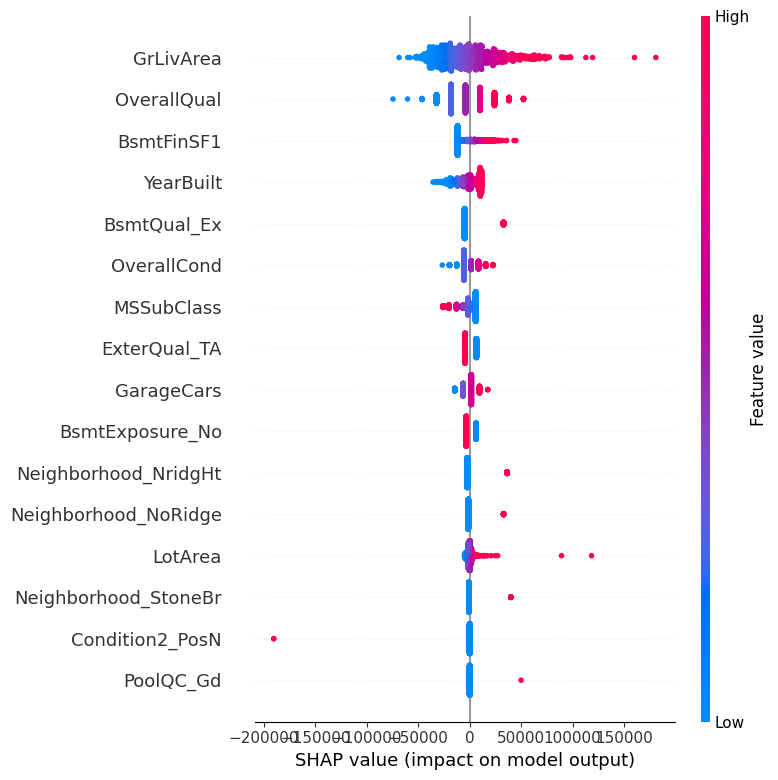

In [46]:
#https://medium.com/defactoblog/explainability-of-the-features-no-of-the-hyperparameters-ad797918155f
#shap.initjs()

# Initialize SHAP explainer
explainer = shap.Explainer(best_model, X_train[col_sel_best])

# Calculate SHAP values
shap_values = explainer(X_train[col_sel_best])

shap.summary_plot(shap_values, X_train[col_sel_best])

In [47]:
#Remove Neighborhood_StoneBr col_sel_best.remove('Neighborhood_StoneBr')
#based on shap graph we should remove these features, but after test, ME is higher than without them, 
#so we continue with with them
#col_sel_best.remove('MSSubClass')
#col_sel_best.remove('BsmtExposure_No')
#col_sel_best.remove('Condition2_PosN')


# Loop through each feature to plot one by one
#for feature in col_sel_best:
    #shap.dependence_plot(
        #ind=feature,                     # Pass the feature name
        #shap_values=shap_values_array,   # Use the extracted SHAP values
        #features=X_train_values,         # The dataset used to compute SHAP values
        #feature_names=col_sel_best       # Feature names to match SHAP values
    #)

In [48]:
# Split the dataset into training and testing sets with the selected features
X_train, X_test, y_train, y_test = train_test_split(X[col_sel_best], y, test_size=0.25, random_state=42)
    
# Initialize and fit the linear regression model
regr = linear_model.LinearRegression()
regr.fit(X_train, y_train)
    
# Predict the target variable for the test set
y_pred = regr.predict(X_test)
    
# Calculate the Mean Squared Error (MSE) for the current model
me = root_mean_squared_error(y_pred, y_test)

print(f"Best ME: {me} with {len(col_sel_best)} features.")
print("Best model Train Score:             ", min_train_score)
print("Best model Test Score:              ", min_test_score)

Best ME: 42154.887883551324 with 16 features.
Best model Train Score:              0.87164
Best model Test Score:               0.76059


In [49]:
#Normalize - no change in prediction accurracy
x = X[col_sel_best].values #returns a numpy array
scaler = preprocessing.StandardScaler()
scaler.fit(x)
x_scaled = scaler.transform(x)
X_norm = pd.DataFrame(x_scaled)
#Split data to test and train
X_train_norm, X_test_norm, y_train_norm, y_test_norm = train_test_split(X_norm, y, test_size = .25, random_state = 42)

regr_norm = linear_model.LinearRegression() # Do not use fit_intercept = False if you have removed 1 column after dummy encoding

regr_norm.fit(X_train_norm, y_train_norm)

y_pred_norm = regr_norm.predict(X_test_norm)

me = root_mean_squared_error(y_pred_norm, y_test_norm)
    
# Output the best result
print(f"ME: {me} with {best_num_features} features.")
print("Best model Train Score:             ", round(regr_norm.score(X_train_norm, y_train_norm), 5))
print("Best model Test Score:              ", round(regr_norm.score(X_test_norm, y_test_norm), 5))


ME: 42154.887883553725 with 16 features.
Best model Train Score:              0.87164
Best model Test Score:               0.76059


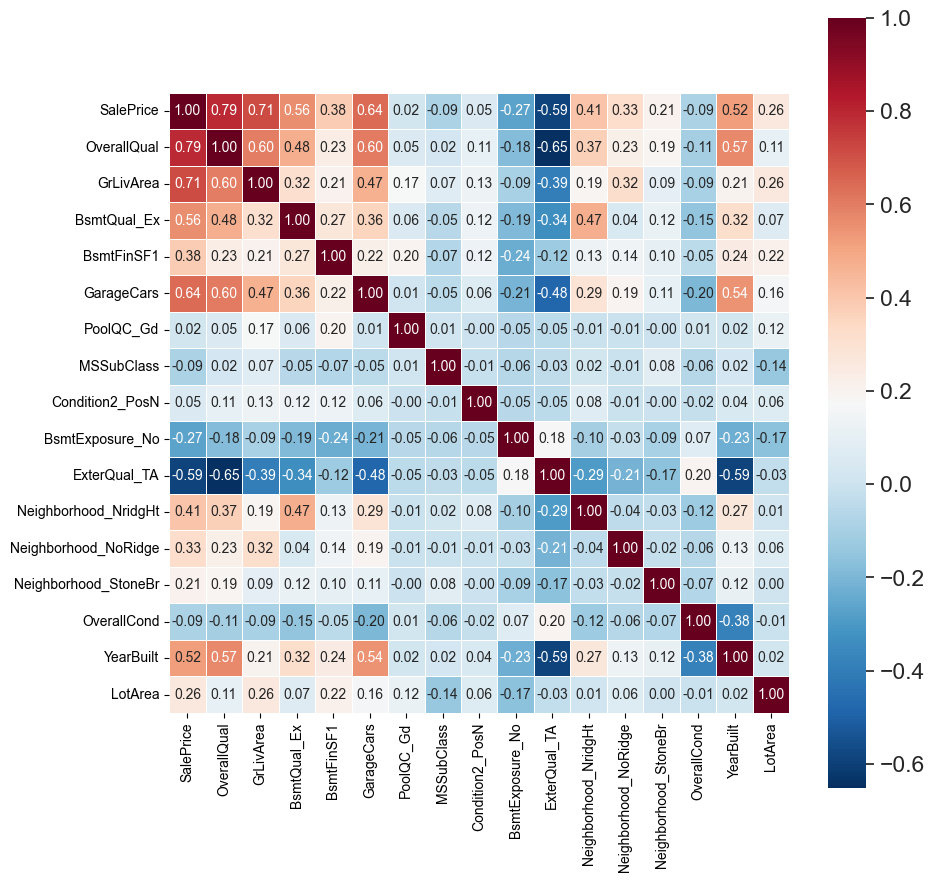

In [50]:
fig, ax = plt.subplots(figsize=(10,10)) #figsize in inches
X_for_correl= pd.concat([y, X[col_sel_best]], axis = 1)
cm = np.corrcoef(X_for_correl.values.T)
sns.set(style='whitegrid', context='notebook')
sns.set(font_scale=1.5)
hm = sns.heatmap(cm,
                 cmap="RdBu_r",
                 cbar=True,
                 annot=True,
                 square=True,
                 fmt='.2f',
                 linewidths = 0.6,
                 annot_kws={'size': 10},
                 yticklabels=X_for_correl.columns.tolist(),
                 xticklabels=X_for_correl.columns.tolist(),)

# Adjust the font size of the x-axis and y-axis categories
ax.set_xticklabels(ax.get_xticklabels(), fontsize=10)
ax.set_yticklabels(ax.get_yticklabels(), fontsize=10)

sns.set(font_scale=1)
# Next line is here in order to fix the bug
#ax.set_ylim(len(X_for_correl), 0) # https://github.com/matplotlib/matplotlib/issues/14751

plt.show()

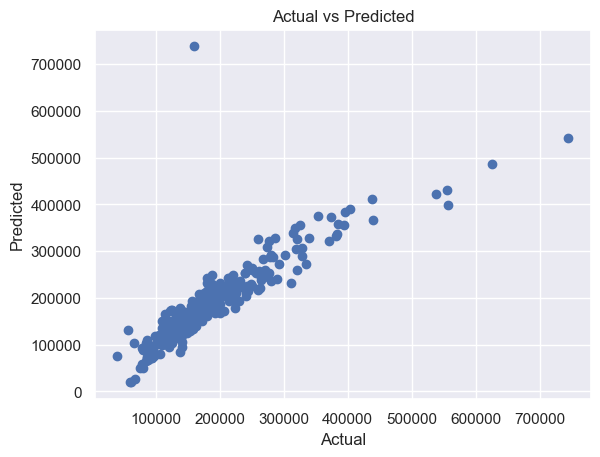

In [51]:
# 5. Visualize
plt.scatter(y_test, y_pred)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs Predicted")
plt.show()

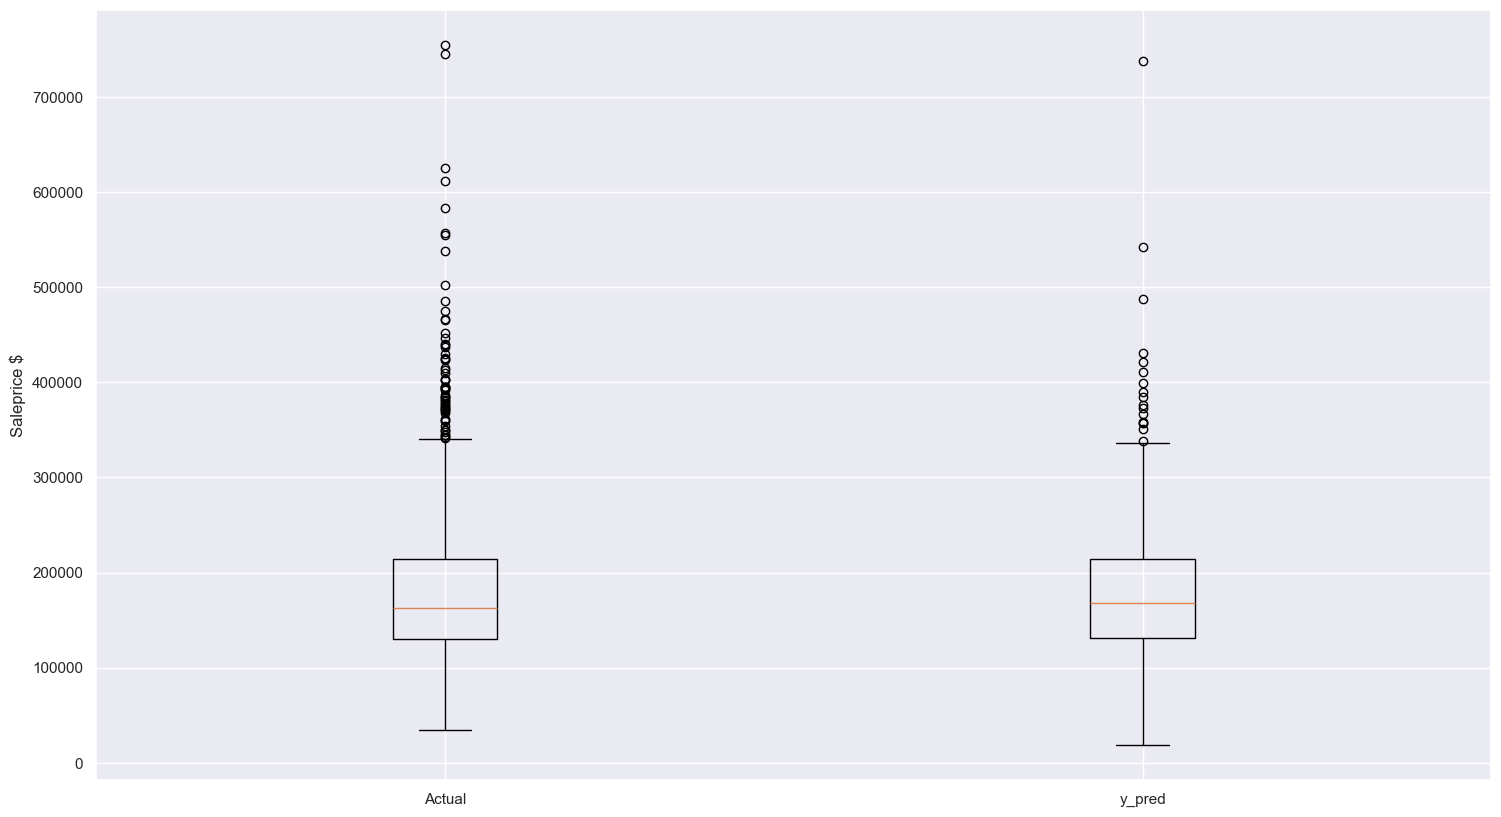

In [52]:
fig, ax = plt.subplots(figsize=(18, 10))
ax.boxplot([y['SalePrice'].to_numpy(), np.array(y_pred).flatten()])
ax.set_xticklabels(['Actual', 'y_pred'])
ax.set_ylabel('Saleprice $')
plt.show()

In [53]:
print("Maximum difference in prediction:", np.max(y_test - y_pred))

Maximum difference in prediction: 202610.73598578712


In [54]:
print("X_train: ", X_train.shape)
print("X_test: ", X_test.shape)
print("Y_train: ", y_train.shape)
print("Y_test: ", y_test.shape)

X_train:  (1051, 16)
X_test:  (351, 16)
Y_train:  (1051, 1)
Y_test:  (351, 1)


### Lazy classification for further best model selection nad hyperparameter tunning

In [55]:
#%pip install lazypredict

In [56]:
#https://medium.com/omics-diary/how-to-use-the-lazy-predict-library-to-select-the-best-machine-learning-model-65378bf4568e
from lazypredict.Supervised import LazyRegressor
import sys
import contextlib

reg = LazyRegressor(verbose=0, 
                    ignore_warnings=False, 
                    custom_metric=None,
                    predictions=False,
                    random_state = 42)

# Initialize LazyClassifier with the custom metric
# Redirect standard output temporarily to suppress prints
with open('nul', 'w') as f, contextlib.redirect_stdout(f):
    models, predictions = reg.fit(X_train, X_test, y_train, y_test)
    model_dictionary = reg.provide_models(X_train, X_test, y_train, y_test)

# Print results
print(models)


100%|██████████| 42/42 [00:01<00:00, 23.34it/s]

                                        Adjusted R-Squared  \
Model                                                        
XGBRegressor                                          0.89   
GradientBoostingRegressor                             0.88   
ExtraTreesRegressor                                   0.85   
RandomForestRegressor                                 0.85   
HistGradientBoostingRegressor                         0.84   
LGBMRegressor                                         0.84   
AdaBoostRegressor                                     0.82   
BaggingRegressor                                      0.81   
KNeighborsRegressor                                   0.78   
DecisionTreeRegressor                                 0.78   
ElasticNet                                            0.75   
SGDRegressor                                          0.75   
RidgeCV                                               0.75   
LassoCV                                               0.75   
Bayesian

### XGB Regressor fine parameter tunning

In [57]:
from xgboost import XGBRegressor

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X[col_sel_best], y, test_size=0.25, random_state=42)

# Define the parameter grid to search through
param_grid = {
    'n_estimators': [339, 340, 341],   # Number of boosting rounds
    'max_depth': [4, 5, 6],            # Maximum tree depth for base learners
    'learning_rate': [0.12, 0.13, 0.14], # Boosting learning rate
    'subsample': [0.81, 0.82, 0.83],      # Subsample ratio of the training instance
    'colsample_bytree': [0.56, 0.57, 0.58] # Subsample ratio of columns when constructing each tree
}

# Initialize an empty list to store the results
results = []

# Loop through all parameter combinations
for n_estimators in param_grid['n_estimators']:
    for max_depth in param_grid['max_depth']:
        for learning_rate in param_grid['learning_rate']:
            for subsample in param_grid['subsample']:
                for colsample_bytree in param_grid['colsample_bytree']:
                    
                    # Initialize the XGBRegressor with the current set of parameters
                    model_XGBRegressor = XGBRegressor(
                        n_estimators=n_estimators,
                        max_depth=max_depth,
                        learning_rate=learning_rate,
                        subsample=subsample,
                        colsample_bytree=colsample_bytree,
                        random_state=42
                    )
                    
                    # Fit the model on the training data
                    model_XGBRegressor.fit(X_train, y_train)
                    
                    # Predict on the test set
                    y_pred = model_XGBRegressor.predict(X_test)
                    
                    # Calculate the Mean Squared Error
                    me = root_mean_squared_error(y_test, y_pred)
                    
                    # Append the results to the list
                    results.append({
                        'n_estimators': n_estimators,
                        'max_depth': max_depth,
                        'learning_rate': learning_rate,
                        'subsample': subsample,
                        'colsample_bytree': colsample_bytree,
                        'me': me
                    })

# Convert results to a DataFrame for easy analysis
results_df = pd.DataFrame(results)

# Display the best parameters based on the lowest MSE
best_result = results_df.loc[results_df['me'].idxmin()]
print("Best Parameters:")
print(best_result)
#Best parameters
param_grid = {
    'n_estimators': [340],   # Number of boosting rounds
    'max_depth': [5],            # Maximum tree depth for base learners
    'learning_rate': [0.13], # Boosting learning rate
    'subsample': [0.82],      # Subsample ratio of the training instance
    'colsample_bytree': [0.57] # Subsample ratio of columns when constructing each tree
}
model_XGBRegressor.fit(X_train, y_train)                                    
y_pred = model_XGBRegressor.predict(X_test)

Best Parameters:
n_estimators         340.00
max_depth              5.00
learning_rate          0.13
subsample              0.82
colsample_bytree       0.57
me                 23713.90
Name: 121, dtype: float64


In [102]:
col_sel_best

['OverallQual',
 'GrLivArea',
 'BsmtQual_Ex',
 'BsmtFinSF1',
 'GarageCars',
 'PoolQC_Gd',
 'MSSubClass',
 'Condition2_PosN',
 'BsmtExposure_No',
 'ExterQual_TA',
 'Neighborhood_NridgHt',
 'Neighborhood_NoRidge',
 'Neighborhood_StoneBr',
 'OverallCond',
 'YearBuilt',
 'LotArea']

### Keras Linear regression

In [1]:
from keras.models import Sequential
from keras.layers import Dense
import tensorflow as tf
print('Version TensorFlow :',tf.__version__)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X[col_sel_best], y, test_size=0.25, random_state=42)

# Define the root mean squared error function
def root_mean_squared_error(y_true, y_pred):
    y_true = tf.cast(y_true, tf.float32)  # Cast y_true to float32
    y_pred = tf.cast(y_pred, tf.float32)  # Cast y_pred to float32
    return tf.sqrt(tf.reduce_mean(tf.square(y_true - y_pred)))

# Define the hyperparameters to test
epochs_list = [1000]  # Different values for epochs
learning_rates = [0.15, 0.1]  # Different learning rates
#https://keras.io/api/optimizers/
optimizers = [tf.keras.optimizers.Adam, tf.keras.optimizers.SGD, tf.keras.optimizers.RMSprop, tf.keras.optimizers.Adagrad, tf.keras.optimizers.Adadelta, tf.keras.optimizers.Adamax, tf.keras.optimizers.Nadam, tf.keras.optimizers.Ftrl, tf.keras.optimizers.Lion]  # Different optimizers

# Store results
results = []

# Loop through different combinations of hyperparameters
for epochs in epochs_list:
    for learning_rate in learning_rates:
        for optimizer in optimizers:
            # Define the model        
            model = tf.keras.Sequential([
                # Input layer with 15 features
                Dense(64, input_dim=15, activation='relu'),  # First hidden layer with 64 neurons and ReLU activation                    Dense(32, activation='relu'),                # Second hidden layer with 32 neurons and ReLU activation
                Dense(16, activation='relu'),                # Third hidden layer with 16 neurons and ReLU activation
                Dense(8, activation='relu'),                 # Fourth hidden layer with 8 neurons and ReLU activation
                Dense(1, activation='linear')                # Output layer for regression
                                        ])
            
            # Compile the model with custom RMSE metric
            opt = optimizer(learning_rate=learning_rate)
            model.compile(
                loss='mean_squared_error',
                optimizer=opt,
                metrics=[root_mean_squared_error]
            )

            # Train the model
            history = model.fit(X_train, y_train, epochs=epochs, verbose=False)

            # Evaluate the model
            evaluation = model.evaluate(X_test, y_test, verbose=0)
            mse, rmse = evaluation[0], evaluation[1]

            # Save the result
            results.append({
                'epochs': epochs,
                'learning_rate': learning_rate,
                'optimizer': optimizer.__name__,
                'mse': mse,
                'rmse': rmse
            })

# Convert results to a DataFrame for easier viewing
results_df = pd.DataFrame(results)

# Find the best parameters based on RMSE
best_result = results_df.loc[results_df['rmse'].idxmin()]

print("Best Parameters:")
print(best_result)
print("\nAll Results:")
print(results_df)

Version TensorFlow : 2.18.0-dev20240819


NameError: name 'train_test_split' is not defined

In [ ]:
# Define the parameter grid to search through
epochs_list = [1000, 2000, 3000, 4000]  # List of different epochs to test
learning_rate_list = [0.01, 0.05, 0.1, 0.2]  # List of different learning rates to test

# Initialize an empty list to store the results
results = []

# Loop through all combinations of epochs and learning rates
for epochs in epochs_list:
    for learning_rate in learning_rate_list:
        # Initialize the optimizer with the current learning rate
        optimizer = tf.keras.optimizers.Adamax
        opt = optimizer(learning_rate=learning_rate)
        
        # Compile the model with custom RMSE metric
        model.compile(loss='mean_squared_error', optimizer=opt, metrics=[root_mean_squared_error])
        
        # Train the model
        history = model.fit(X_train, y_train, epochs=epochs, verbose=False)
        
        # Evaluate the model
        evaluation = model.evaluate(X_test, y_test, verbose=0)
        mse, rmse = evaluation[0], evaluation[1]
        
        # Append the results to the list
        results.append({
            'epochs': epochs,
            'learning_rate': learning_rate,
            'mse': mse,
            'rmse': rmse
        })
        
        print(f"RMSE: {rmse}, Epochs: {epochs}, Learning Rate: {learning_rate}")

# Convert results to a DataFrame for easy analysis
results_df = pd.DataFrame(results)

# Display the best parameters based on the lowest RMSE
best_result = results_df.loc[results_df['rmse'].idxmin()]
print("\nBest Parameters:")
print(best_result)

### Prediction for specific House

In [ ]:
# Define the feature names
features = [
    'OverallQual', 'GrLivArea', 'BsmtQual_Ex', 'BsmtFinSF1', 'GarageCars',
    'PoolQC_Gd', 'MSSubClass', 'Condition2_PosN', 'BsmtExposure_No', 'ExterQual_TA',
    'Neighborhood_NridgHt', 'Neighborhood_NoRidge', 'OverallCond', 'YearBuilt', 'LotArea'
]

# Define specific values for each feature
values = {
    'OverallQual': 7,
    'GrLivArea': 1500,
    'BsmtQual_Ex': 1,
    'BsmtFinSF1': 300,
    'GarageCars': 1,
    'PoolQC_Gd': 0,
    'MSSubClass': 20,
    'Condition2_PosN': 0,
    'BsmtExposure_No': 1,
    'ExterQual_TA': 0,
    'Neighborhood_NridgHt': 1,
    'Neighborhood_NoRidge': 0,
    'OverallCond': 5,
    'YearBuilt': 2005,
    'LotArea': 8500
}

# Create a DataFrame with a single row using the values
one_house = pd.DataFrame([values], columns=features)

predicted_price = model_GradientBoostingRegressor.predict(one_house)

print(f"Predicted price for your beloved house is: {int(round(predicted_price[0])):,}$")

### Evaluation

## Submission To Kaggle

In [679]:
best_model.fit(X[col_sel_best], y) #all data fit
y_pred = best_model.predict(test_df[col_sel_best])
new_submission.loc[:,['SalePrice']] = y_pred

In [1319]:
model_XGBRegressor.fit(X[col_sel_best], y) #all data fit
y_pred = best_model.predict(test_df[col_sel_best])
new_submission.loc[:,['SalePrice']] = y_pred

In [1320]:
now = datetime.datetime.now()
filename = f"kaggle_submission_{now.strftime('%Y-%m-%d_%H-%M-%S')}.csv"
new_submission.to_csv(filename, index=False)
